# Clustering Customers

Dataset: https://www.kaggle.com/datasets/dev0914sharma/customer-clustering

## Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
customer = pd.read_csv("segmentation data.csv")
df = customer.copy()

In [3]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2000.0,1.000010e+08,577.494589,100000001.0,1.000005e+08,100001000.5,1.000015e+08,100002000.0
Sex,2000.0,4.570000e-01,0.498272,0.0,0.000000e+00,0.0,1.000000e+00,1.0
Marital status,2000.0,4.965000e-01,0.500113,0.0,0.000000e+00,0.0,1.000000e+00,1.0
Age,2000.0,3.590900e+01,11.719402,18.0,2.700000e+01,33.0,4.200000e+01,76.0
Education,2000.0,1.038000e+00,0.599780,0.0,1.000000e+00,1.0,1.000000e+00,3.0
Income,2000.0,1.209544e+05,38108.824679,35832.0,9.766325e+04,115548.5,1.380722e+05,309364.0
Occupation,2000.0,8.105000e-01,0.638587,0.0,0.000000e+00,1.0,1.000000e+00,2.0
Settlement size,2000.0,7.390000e-01,0.812533,0.0,0.000000e+00,1.0,1.000000e+00,2.0


In [5]:
df.shape

(2000, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [7]:
df.isna().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [8]:
# There are no missing values

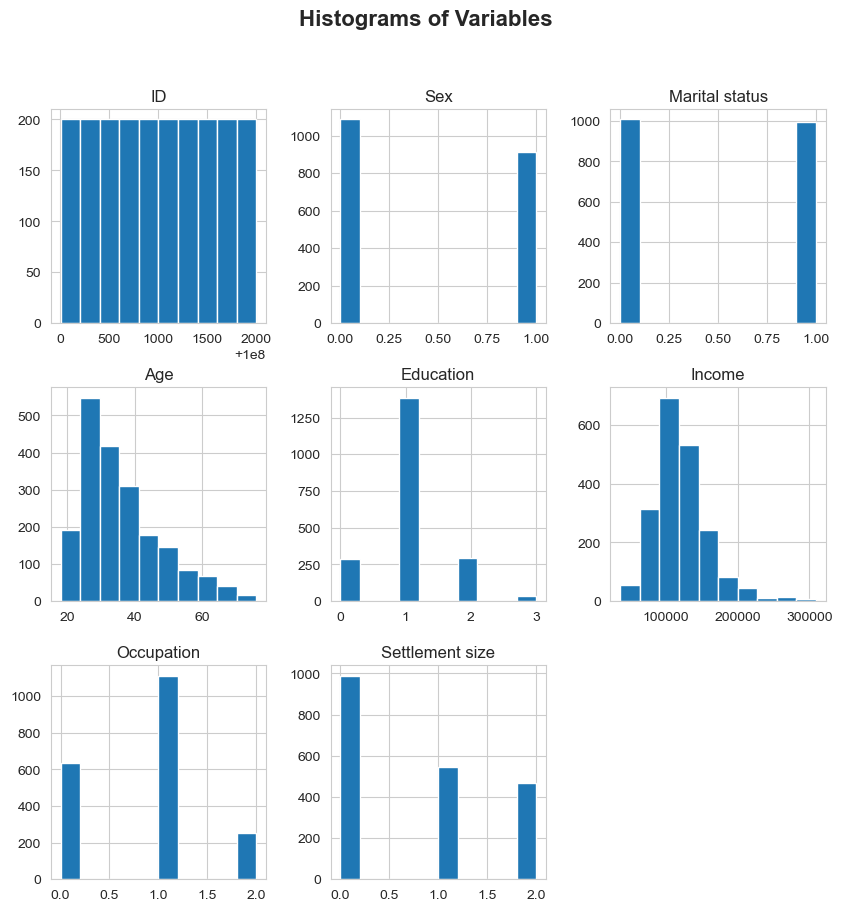

In [9]:
sns.set_style("whitegrid")
df.hist(figsize=(10, 10))
plt.suptitle("Histograms of Variables", fontsize=16, fontweight="bold")
plt.show()

In [10]:
# We won't need the ID variable

In [11]:
df.drop(columns=["ID"], inplace=True)

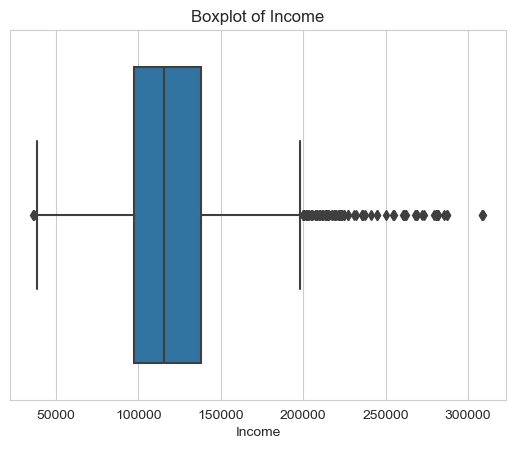

In [12]:
# Let's check the outliers in the Income variables
sns.boxplot(data=df, x=df["Income"])
plt.title("Boxplot of Income")
plt.show()

In [13]:
# We can handle outliers by capping them to thresholds values

Q1 = df["Income"].quantile(0.25)
Q3 = df["Income"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df["Income"] = np.where(df["Income"] < lower_bound, lower_bound, df["Income"])
df["Income"] = np.where(df["Income"] > upper_bound, upper_bound, df["Income"])

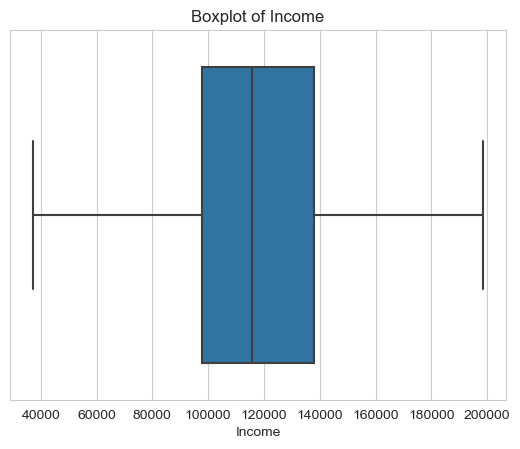

In [14]:
sns.boxplot(data=df, x=df["Income"])
plt.title("Boxplot of Income")
plt.show()

In [15]:
print("Before handling outliers:")
print(customer["Income"].describe().T)

Before handling outliers:
count      2000.000000
mean     120954.419000
std       38108.824679
min       35832.000000
25%       97663.250000
50%      115548.500000
75%      138072.250000
max      309364.000000
Name: Income, dtype: float64


In [16]:
print("After handling outliers:")
print(df["Income"].describe().T)

After handling outliers:
count      2000.000000
mean     119501.931625
std       33693.203903
min       37049.750000
25%       97663.250000
50%      115548.500000
75%      138072.250000
max      198685.750000
Name: Income, dtype: float64


## Analyzing Relationships

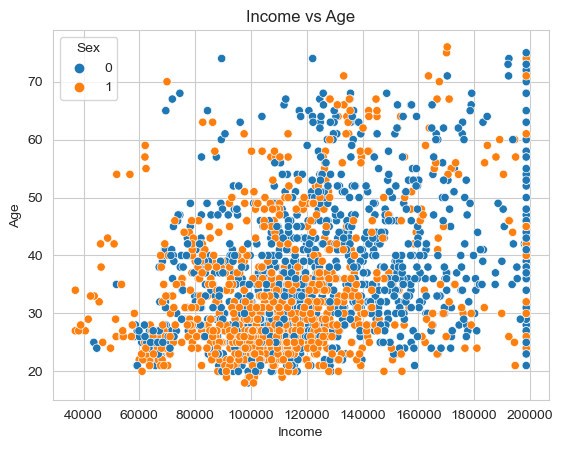

In [17]:
# Let's analyze the relationship between Age and Income

sns.scatterplot(data=df, x="Income", y="Age", hue="Sex")
plt.title("Income vs Age")
plt.xlabel("Income")
plt.ylabel("Age")
plt.show()

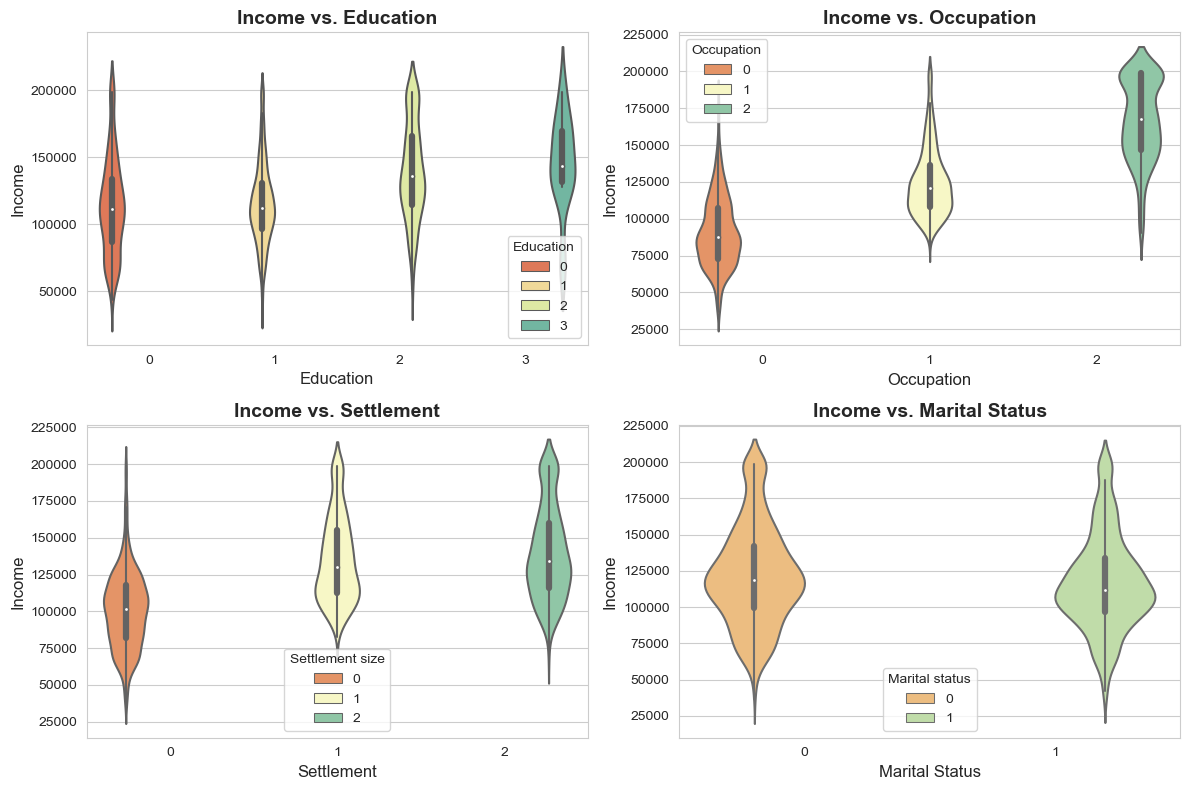

In [18]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Education vs Income
sns.violinplot(data=df, x="Education", y="Income", hue="Education", palette="Spectral", legend=False, ax=axes[0, 0])
axes[0, 0].set_title("Income vs. Education", fontsize=14, fontweight="bold")
axes[0, 0].set_xlabel("Education", fontsize=12)
axes[0, 0].set_ylabel("Income", fontsize=12)

# Occupation vs Income
sns.violinplot(data=df, x='Occupation', y='Income', hue="Occupation", palette="Spectral", legend=False, ax=axes[0, 1])
axes[0, 1].set_title("Income vs. Occupation", fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel("Occupation", fontsize=12)
axes[0, 1].set_ylabel("Income", fontsize=12)

# Settlement Size vs Income
sns.violinplot(data=df, x='Settlement size', y='Income', hue="Settlement size", palette="Spectral", legend=False, ax=axes[1, 0])
axes[1, 0].set_title("Income vs. Settlement", fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel("Settlement", fontsize=12)
axes[1, 0].set_ylabel("Income", fontsize=12)

# Marital Status vs Income
sns.violinplot(data=df, x='Marital status', y='Income', hue="Marital status", palette="Spectral", legend=False, ax=axes[1, 1])
axes[1, 1].set_title("Income vs. Marital Status", fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel("Marital Status", fontsize=12)
axes[1, 1].set_ylabel("Income", fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

In [19]:
# Correlation

corr_matrix = df.corr()
corr_income = corr_matrix["Income"].sort_values(ascending=False)
print(corr_income)

Income             1.000000
Occupation         0.698651
Settlement size    0.509206
Age                0.342544
Education          0.232977
Marital status    -0.073413
Sex               -0.204294
Name: Income, dtype: float64


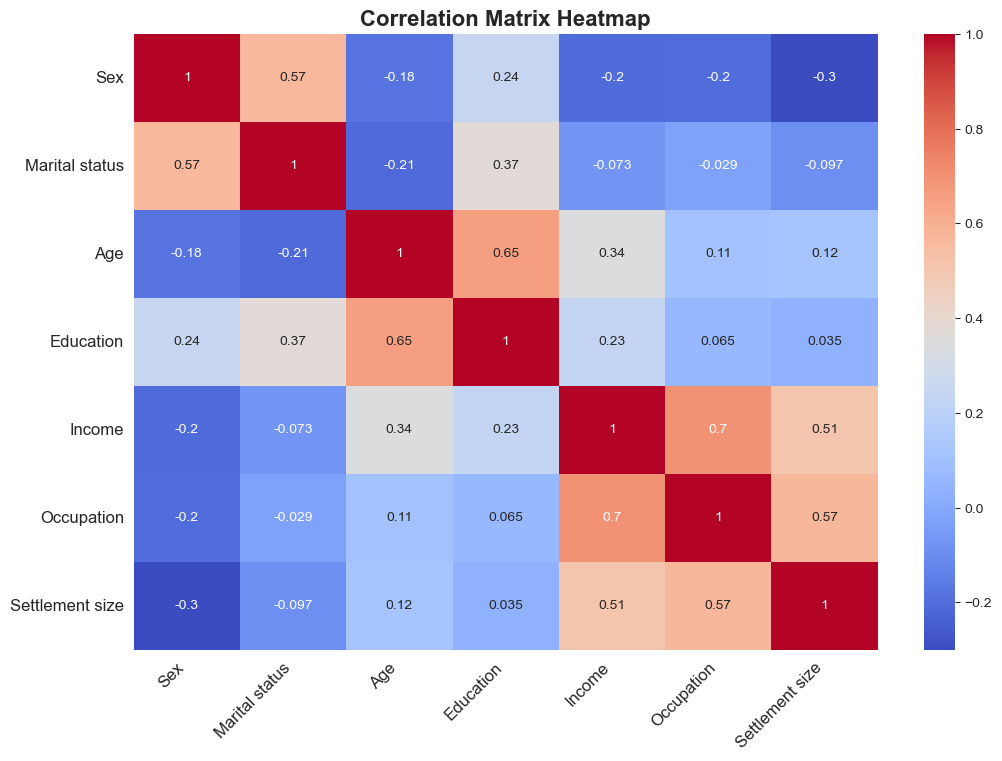

In [20]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", cbar=True)
plt.title('Correlation Matrix Heatmap', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.yticks(rotation=0, fontsize=12)
plt.show()

As it seems, Occupation is the most positively correlated variable, while Marital status shows a negative correlation.

In [21]:
# We can create a new variable using Ages

df['Age_Group'] = pd.cut(df['Age'], bins=[18, 30, 50, np.inf], labels=['Young', 'Middle-aged', 'Elderly'])

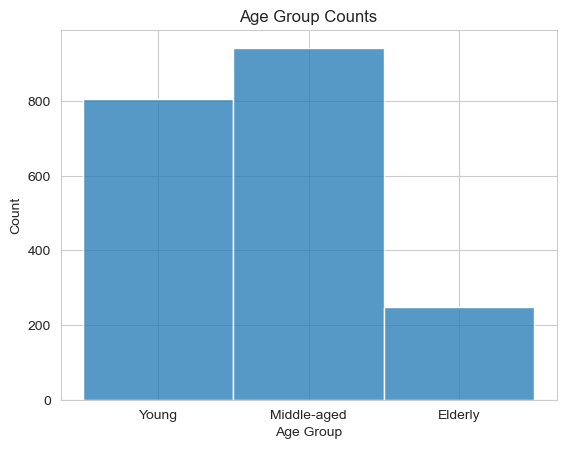

In [22]:
sns.set_style("whitegrid")
sns.histplot(data=df, x="Age_Group", palette="Spectral", legend=False)
plt.title("Age Group Counts")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

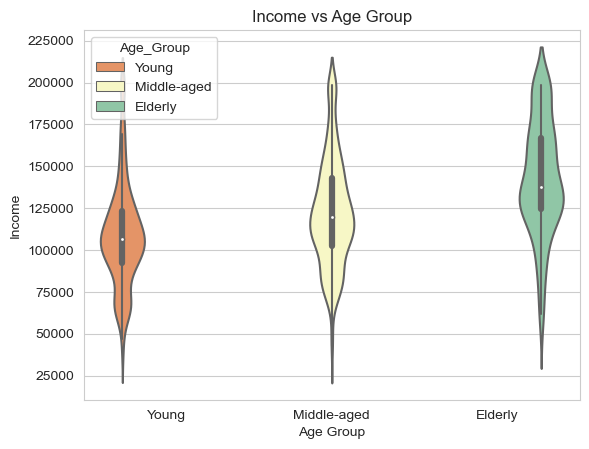

In [23]:
sns.set_style("whitegrid")
sns.violinplot(data=df, x="Age_Group", y="Income", hue="Age_Group", palette="Spectral", legend=False)
plt.title("Income vs Age Group")
plt.xlabel("Age Group")
plt.ylabel("Income")
plt.show()

We explored the data and relationships, now let's dive deeper.

In [24]:
df["Age_Group"] = df["Age_Group"].astype("object")

In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Age_Group"] = le.fit_transform(df["Age_Group"])

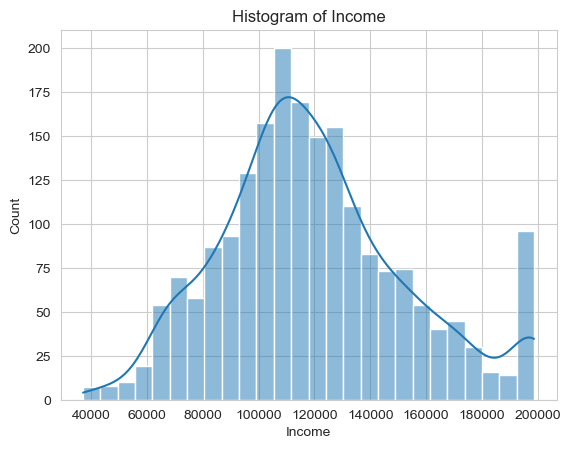

In [26]:
# Histogram and density plot of income distribution

sns.histplot(df['Income'], kde=True)
plt.title('Histogram of Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

In [27]:
# Average Income by Age Group

grouped_income = df.groupby('Age_Group')['Income'].mean()
print("\nAverage Income by Age Group:")
print(grouped_income.to_string())


Average Income by Age Group:
Age_Group
0    142696.942540
1    122618.408802
2    108794.299007
3     99219.000000


## Modeling

### K-Means

In [28]:
from sklearn.cluster import KMeans

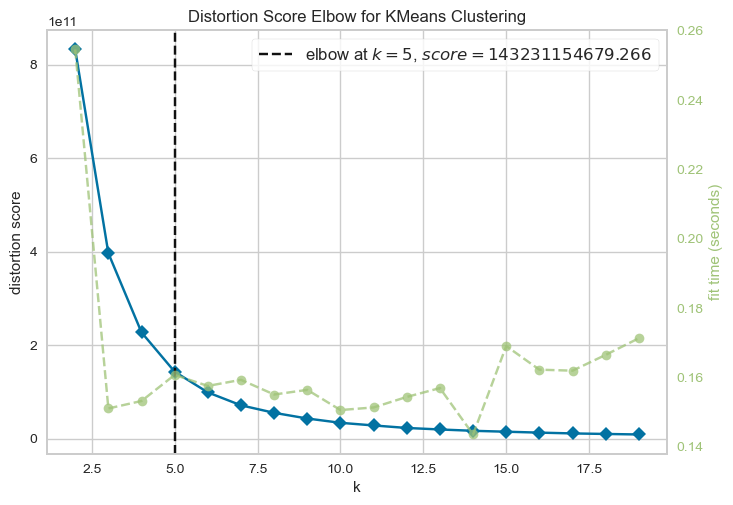

In [29]:
# Let's find the best number of clusters

from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2, 20))
visualizer.fit(df)
visualizer.poof();

We've selected 5.

In [30]:
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(df)

#### 2D

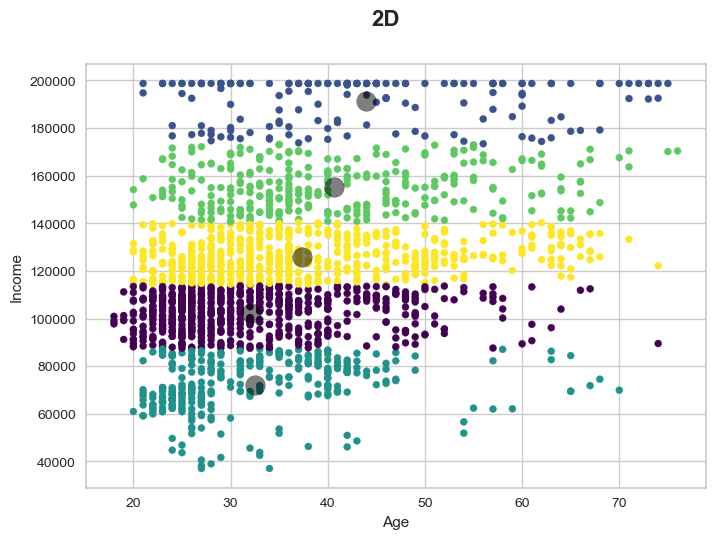

In [31]:
clusters = k_fit.labels_
centers = k_fit.cluster_centers_

plt.scatter(df.iloc[:, 2], df.iloc[:, 4], c=clusters, s=25, cmap="viridis")
plt.scatter(centers[:, 2], centers[:, 4], c="black", s=200, alpha=0.5)

plt.suptitle("2D", fontsize=16, fontweight="bold")
plt.xlabel("Age")
plt.ylabel("Income")

plt.show()

#### 3D

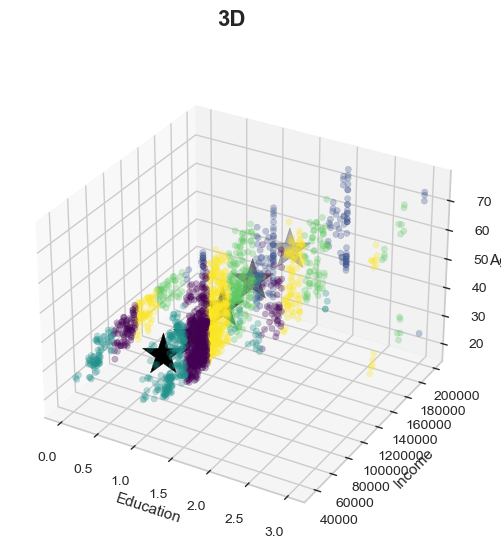

In [32]:
plt.rcParams["figure.figsize"] = (8, 6)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.scatter(df.iloc[:, 3], df.iloc[:, 4], df.iloc[:, 2], c=clusters, cmap="viridis", alpha=0.3)
ax.scatter(centers[:, 3], centers[:, 4], centers[:, 2], marker="*", c="#000000", s=1000)

plt.suptitle("3D", fontsize=16, fontweight="bold")
ax.set_xlabel("Education")
ax.set_ylabel("Income")
ax.set_zlabel("Age")

plt.show()

### Hierarchical Clustering

In [33]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [34]:
hc_complete = linkage(df, "complete")
hc_average = linkage(df, "average")
hc_single = linkage(df, "single")

print("\nHierarchical Clustering (Complete Linkage):\n", hc_complete)


Hierarchical Clustering (Complete Linkage):
 [[6.16000000e+02 7.14000000e+02 0.00000000e+00 2.00000000e+00]
 [9.50000000e+01 1.02200000e+03 0.00000000e+00 2.00000000e+00]
 [1.54000000e+02 2.72000000e+02 0.00000000e+00 2.00000000e+00]
 ...
 [3.99200000e+03 3.99300000e+03 6.96637673e+04 6.60000000e+02]
 [3.99400000e+03 3.99500000e+03 9.16522505e+04 1.34000000e+03]
 [3.99600000e+03 3.99700000e+03 1.61636007e+05 2.00000000e+03]]


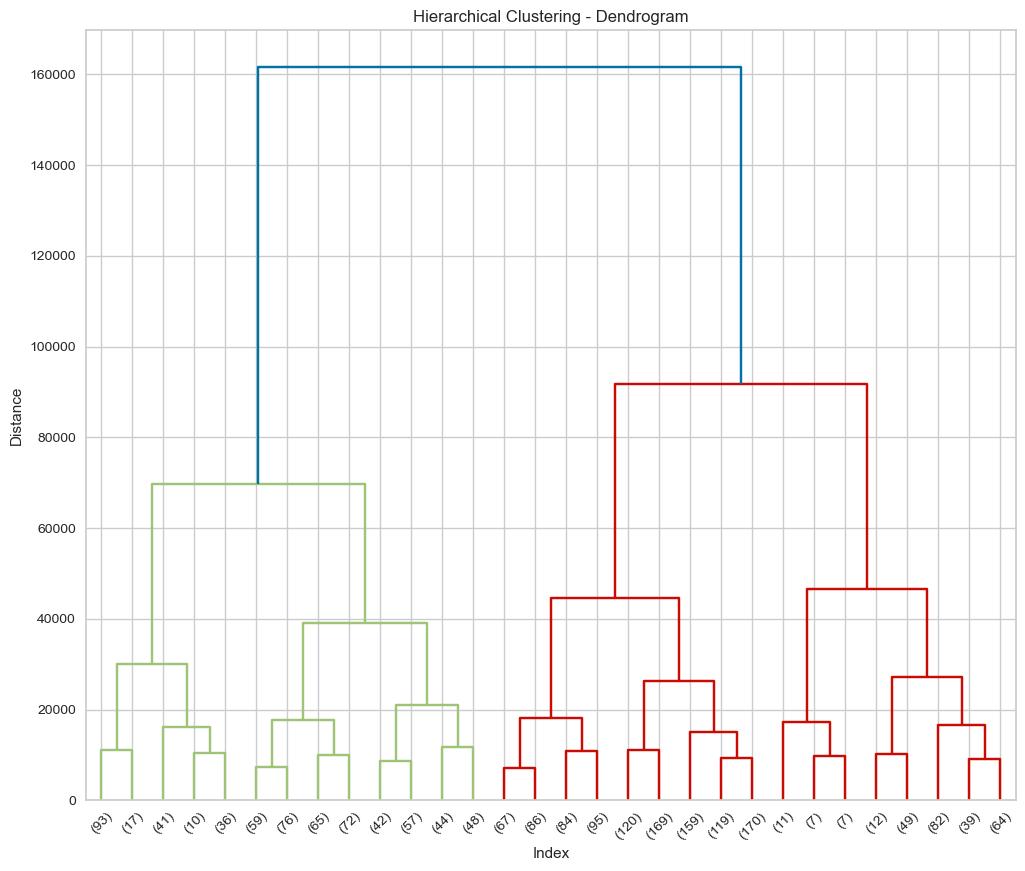

In [35]:
plt.figure(figsize=(12, 10))
plt.title("Hierarchical Clustering - Dendrogram")
plt.xlabel("Index")
plt.ylabel("Distance")

dendrogram(
    hc_complete, 
    leaf_font_size=10, 
    truncate_mode="lastp", 
    p=30
)
# last 30 clusters

plt.show()

### PCA

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
df = StandardScaler().fit_transform(df)

In [43]:
from sklearn.decomposition import PCA

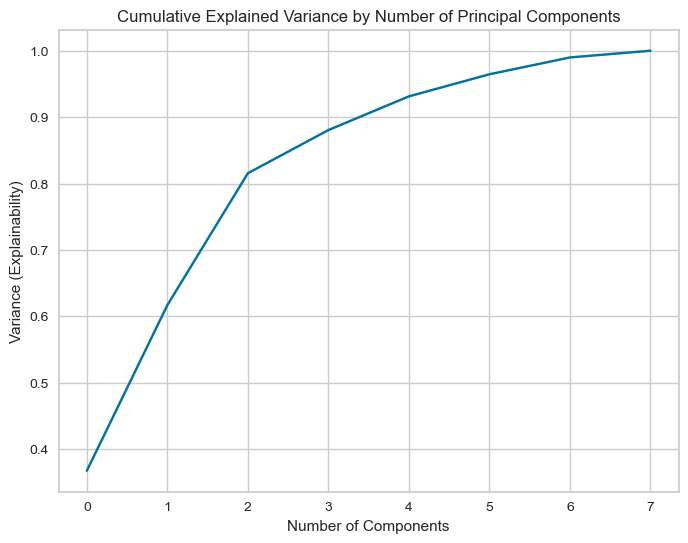

In [44]:
# Let's see how many components should we use

pca = PCA()
pca_fit = pca.fit_transform(df)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title("Cumulative Explained Variance by Number of Principal Components")
plt.ylabel("Variance (Explainability)")
plt.xlabel("Number of Components")
plt.show()

In [46]:
pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df)

components = pd.DataFrame(data=pca_fit, columns=["first_component","second_component"])
print(components.head())

print(pca.explained_variance_ratio_)

   first_component  second_component
0         3.626675          0.865342
1        -0.476131         -0.680547
2        -0.045664          0.564333
3         1.771971         -0.869812
4         2.485127         -0.115038
[0.36743316 0.24938219]


"components" explains ~60% of the variance in the df.